## Método de clasifición _K-means Clustering_

No supervisado

16/08/2023

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d # Módulo de geometría computacional para calcular y visualizar diagramas de Voronoi

In [5]:
np.random.seed(23)
X = np.random.rand(100, 2) 
X.shape

(100, 2)

In [6]:
X.size

200

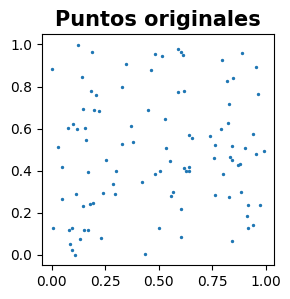

In [9]:
plt.figure( figsize = (3,3) )
plt.scatter( X[:,0], X[:, 1], s = 2)
plt.title('Puntos originales', size = 15, weight = 'bold')
plt.show()


Implemento el modelo de KMeans

In [11]:
# Número de clusters
n_clusters = 5

# Implementación del modelo  
kmeans = KMeans( n_clusters= n_clusters, n_init= 20, 
                 random_state= 10 ).fit(X)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Centroides de los clusters
centroindes = kmeans.cluster_centers_

In [12]:
labels

array([4, 3, 1, 2, 0, 1, 3, 4, 3, 2, 3, 2, 3, 0, 3, 4, 1, 2, 3, 1, 4, 0,
       2, 0, 4, 3, 4, 2, 4, 2, 3, 3, 4, 2, 3, 1, 3, 1, 2, 1, 3, 2, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 2, 2, 0, 1, 4, 3, 0, 4, 0, 0, 0, 2, 4, 2, 0,
       1, 2, 1, 3, 1, 4, 0, 1, 1, 3, 4, 2, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1,
       4, 2, 0, 4, 2, 1, 0, 1, 3, 3, 3, 3])

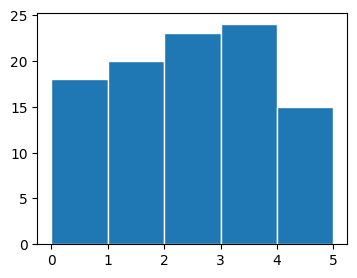

In [15]:
plt.figure( figsize = (4,3) )
plt.hist(labels, bins= 5, range = (0, 5), edgecolor = 'white')
plt.show()

In [16]:
centroindes

array([[0.55925437, 0.39024758],
       [0.19391709, 0.71552106],
       [0.16787948, 0.20444998],
       [0.86268872, 0.38997309],
       [0.70547547, 0.87718288]])

Calculo el diagrama de Voronoi

In [21]:
vor = Voronoi( centroindes )
vor

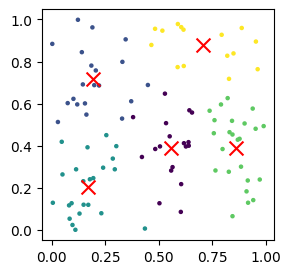

In [26]:
plt.figure( figsize = (3,3) )
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
for n in range(len(centroindes)):
    plt.scatter( centroindes[n, 0], centroindes[n, 1], 
                marker= 'x', s = 100, c ='red' )
plt.show()